# Data collection

In [ ]:
import matplotlib.pyplot as plt
import socket
import time
import serial
# import robot_vlp.data.triad_openvr.triad_openvr as vr
import pandas as pd
import numpy as np
import robot_vlp.data_collection.communication as c
import os
import robot_vlp.modeling.gen_cnc_vlp_model as vlp
from tensorflow.keras.models import load_model
from robot_vlp.config import  MODELS_DIR
import robot_vlp.modeling.EKF as ekf

%load_ext autoreload
%autoreload 2


2025-04-13 10:50:40.744 | INFO     | robot_vlp.config:<module>:11 - PROJ_ROOT path is: /Users/tyrelglass/PhD/Repositories/robot-vlp


In [21]:
vive = c.vive_setup()

{'hmd_1': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracked_device object at 0x0000018193EFA260>, 'tracker_1': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracked_device object at 0x0000018193EF9960>, 'tracking_reference_1': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracking_reference object at 0x0000018193EF9E40>, 'tracking_reference_2': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracking_reference object at 0x0000018193EFA320>}


In [59]:
print(c.read_vive(vive, n_readings= 3) ) #test

[array(([[-0.46225896, -0.8858366 ,  0.04012636,  0.00619764], [ 0.00166411, -0.04611783, -0.9989346 , -0.79024637], [ 0.8867434 , -0.46169972,  0.02279251, -0.6765637 ]],),
      dtype=[('m', '<f4', (3, 4))]), array(([[-0.4620658 , -0.8859375 ,  0.04012403,  0.0062117 ], [ 0.0015    , -0.0460242 , -0.9989392 , -0.79022735], [ 0.8868444 , -0.46151543,  0.02259511, -0.67657477]],),
      dtype=[('m', '<f4', (3, 4))]), array(([[-0.46197736, -0.8859842 ,  0.04011114,  0.00625453], [ 0.00161426, -0.04606657, -0.9989371 , -0.79027617], [ 0.88689023, -0.46142158,  0.02271192, -0.6765979 ]],),
      dtype=[('m', '<f4', (3, 4))])]


In [29]:
# log_file = 'exp2_0.csv'
# c.vive_robot_log_clear(log_file= log_file)
c.take_vive_cal_point(point_no = 3, log_file = log_file, vive = vive)

In [30]:

df= pd.read_csv(log_file, delimiter = '|')
df = c.parse_vive(df)
transformer = c.ViveToRobotTransform()
transformer.derive_transform(df)

In [31]:
last_vive_point = c.get_last_vive_position(log_file)
transformed_point = transformer.transform_pose(c.add_bottom_row(last_vive_point))
vive_x, vive_y, vive_z , vive_pitch, vive_yaw, vive_roll = c.extract_pose_y_up(transformed_point)

vive_x, vive_y

(np.float64(0.8818928292362993), np.float64(-0.008833708906460735))

In [32]:
nano_response = c.send_command_to_nano('')
nano_response

Connected to ESP server at 192.168.10.102:8080
Response received: SETUP COMPLETE



'SETUP COMPLETE\r\n'

In [ ]:

nano_response = c.send_command_to_nano('TURN:-500')
nano_response
nano_response = c.send_command_to_nano('')

Connected to ESP server at 192.168.10.102:8080
Response received: Unknown command.

Connected to ESP server at 192.168.10.102:8080
Response received: Unknown command.



In [61]:
nano_response = c.send_command_to_nano('FORWARD:600')
nano_response
nano_response = c.send_command_to_nano('')

Connected to ESP server at 192.168.10.102:8080
Response received: Driving forward for 300 ms...

Connected to ESP server at 192.168.10.102:8080
Response received: Forward done



In [36]:
nano_response = c.send_command_to_nano('MOVE:3000')
nano_response
nano_response = c.send_command_to_nano('')

Connected to ESP server at 192.168.10.102:8080
Response received: Driving forward for 3000 ms...

Connected to ESP server at 192.168.10.102:8080
Response received: Forward done



In [35]:
c.read_n_vlp(3)

taking vlp readings:  0 1 2 

[[1858,
  1855,
  1843,
  1850,
  1856,
  1853,
  1867,
  1834,
  1856,
  1850,
  1852,
  1854,
  1840,
  1844,
  1848,
  1842,
  1823,
  1852,
  1846,
  1826,
  1840,
  1841,
  1844,
  1838,
  1835,
  1823,
  1830,
  1841,
  1844,
  1823,
  1825,
  1844,
  1838,
  1831,
  1846,
  1841,
  1832,
  1841,
  1838,
  1829,
  1841,
  1842,
  1816,
  1841,
  1854,
  1846,
  1834,
  1832,
  1843,
  1851,
  1837,
  1823,
  1798,
  1893,
  1922,
  1903,
  1912,
  1894,
  1883,
  1889,
  1860,
  1873,
  1860,
  1864,
  1825,
  1848,
  1864,
  1835,
  1847,
  1834,
  1838,
  1842,
  1815,
  1832,
  1832,
  1828,
  1847,
  1826,
  1828,
  1825,
  1831,
  1830,
  1823,
  1830,
  1814,
  1824,
  1835,
  1835,
  1847,
  1838,
  1835,
  1838,
  1835,
  1838,
  1836,
  1842,
  1843,
  1833,
  1836,
  1846,
  1846,
  1832,
  1840,
  1846,
  1831,
  1841,
  1842,
  1831,
  1836,
  1841,
  1827,
  1834,
  1839,
  1841,
  1842,
  1853,
  1832,
  1840,
  1847,
  1847,
  1830,
  1846,
  1856,
  1844,
  1847,


### Vive based data collection

In [ ]:
enc_per_degree = 11.34 /2
enc_per_cm = 89.08 /2


def calc_dist_to_target():
    return np.sqrt(np.square(target_x - x_hist[-1]) + np.square(target_y - y_hist[-1]))

def calc_ang_adjustment():
    x_d = target_x - x_hist[-1]
    y_d = target_y - y_hist[-1]
    ang_to_tar = np.arctan2(x_d, y_d)*180/np.pi
    ang_corr = ang_to_tar - heading_hist[-1]
    return c.normalize_angle(ang_corr)

def update_heading(ang_corr):
    encoder_corr = int(ang_corr * enc_per_degree)
    cmd = 'TURN:' + str(-int(encoder_corr))    # Have reversed the direction of turn!!!!!
    # print('sending message to robot: ', cmd)
    # print('angle of :', ang_corr)
    c.process_move_wifi(cmd, log_file, vive, transformer= None,vlp_read = False)

    x, y, heading = get_robot_location()
    x_hist.append(x)
    y_hist.append(y)
    heading_hist.append(heading)
    print_location()

def step(distance_m):
    encoder_counts = distance_m * enc_per_cm *100
    cmd = 'MOVE:'+str(encoder_counts)
  
    c.process_move_wifi(cmd, log_file, vive, transformer = None,vlp_read = True)

    x, y, heading = get_robot_location()
    x_hist.append(x)
    y_hist.append(y)
    heading_hist.append(heading)
    print_location()

def nav_to_point():

    while (True) :
        heading_corr = calc_ang_adjustment()
        if abs(heading_corr) > 5:
            update_heading(heading_corr)

        dist_to_target = calc_dist_to_target()
        step(0.1)

        if dist_to_target < 0.06:
            break    

def calculate_heading():
    x_d =  x_hist[-1] - x_hist[-2]
    y_d =  y_hist[-1] - y_hist[-2],
    new_heading = np.arctan2(x_d, y_d)[0]*180/np.pi
    return new_heading

def get_robot_location():
    last_vive_point = c.get_last_vive_position(log_file)
    transformed_point = transformer.transform_pose(c.add_bottom_row(last_vive_point))
    vive_x, vive_y, vive_z , vive_yaw, vive_pitch, vive_roll = c.extract_pose_y_up(transformed_point)

    robot_x = vive_x + 0.07*np.sin(vive_yaw/180*np.pi)
    robot_z = vive_z + 0.07*np.cos(vive_yaw/180*np.pi)

    return robot_x, robot_z, c.normalize_angle(vive_yaw + 180)

def print_location():
    print('x = ', x_hist[-1], ' y = ',y_hist[-1], ' heading = ',heading_hist[-1])

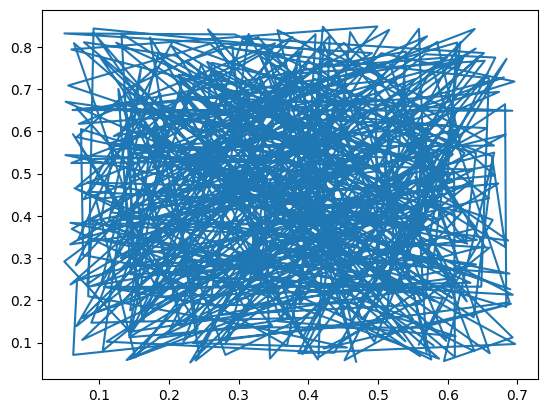

In [ ]:
# np.random.seed(42)  # exp3
# np.random.seed(43)  # exp4
# np.random.seed(44)  # exp5
# np.random.seed(45)  # exp6
# np.random.seed(46)  # exp7

def generate_random_points(num_points, x_range, y_range, min_distance):
    """
    Generates random points within specified x and y ranges,
    ensuring a minimum distance between consecutive points.
    
    Args:
        num_points (int): Number of points to generate.
        x_range (tuple): Tuple specifying the (lower, upper) limits for the x-coordinate.
        y_range (tuple): Tuple specifying the (lower, upper) limits for the y-coordinate.
        min_distance (float): Minimum distance between consecutive points.
    
    Returns:
        np.ndarray: Array of generated points with shape (num_points, 2).
    """
    x_lower, x_upper = x_range
    y_lower, y_upper = y_range

    # Initialize an empty list for the target points
    all_targets = []

    # Generate the first random point within the specified ranges
    x = np.random.uniform(x_lower, x_upper)
    y = np.random.uniform(y_lower, y_upper)
    all_targets.append([x, y])

    # Generate the remaining points
    while len(all_targets) < num_points:
        x = np.random.uniform(x_lower, x_upper)
        y = np.random.uniform(y_lower, y_upper)
        # Check the distance to the last point
        last_x, last_y = all_targets[-1]
        distance = np.sqrt((x - last_x)**2 + (y - last_y)**2)
        if distance >= min_distance:
            all_targets.append([x, y])

    # Convert to a numpy array
    return np.array(all_targets)

# Example usage
x_range = (0.05, 0.7)  # Lower and upper limits for x
y_range = (0.05, 0.85)   # Lower and upper limits for y
num_points = 500
min_distance = 0.1
np.random.seed(1)  # exp1_1
all_targets = generate_random_points(num_points, x_range, y_range, min_distance)

plt.plot(all_targets[:,0], all_targets[:,1])

In [30]:
x_hist = [0.1]
y_hist = [0.05]
heading_hist = [0]



moving to target:  0  at:  [0.3210643  0.62625959]
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -110 encoder counts...

Turning -110 encoder counts...

Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

x =  0.002608530426160792  y =  0.010330279690645941  heading =  18.634600437461273
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 397 encoder counts...

Moving forward 397 encoder counts...

Connected to ESP server at 192.168.10.102:8080
Response received: Move done

taking vlp readings:  0 1 2 x =  0.03366605766786529  y =  0.10355653171451437  heading =  19.195848684834033
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 397 encoder counts...

Moving forward 397 encoder counts...

Connected to ESP server at 192.168.10.102:8080
Response received: Move done

taking vlp readings:  0 1 2 x =  0.06315816949972614  y =  0.1983178885970736  heading =  18.945348747444257
C

c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


AttributeError: 'float' object has no attribute 'dtype'

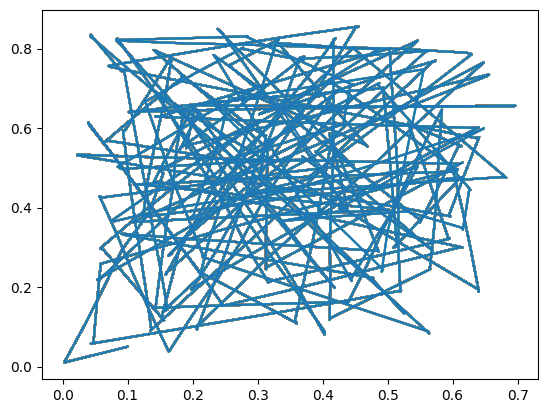

In [31]:
for reading in range(len(all_targets)):
    target = all_targets[reading]
    print('moving to target: ',reading, ' at: ',target)
    target_x= target[0]
    target_y = target[1]
    nav_to_point()
    plt.plot(x_hist, y_hist)


# Live model navigation

In [1]:
import matplotlib.pyplot as plt
import socket
import time
import serial
# import robot_vlp.data.triad_openvr.triad_openvr as vr
import pandas as pd
import numpy as np
import robot_vlp.data_collection.communication as c
import os
import robot_vlp.modeling.gen_cnc_vlp_model as vlp
from tensorflow.keras.models import load_model
from robot_vlp.config import  MODELS_DIR
import robot_vlp.modeling.EKF as ekf

%load_ext autoreload
%autoreload 2

2025-04-27 18:36:22.201 | INFO     | robot_vlp.config:<module>:11 - PROJ_ROOT path is: S:\robot_vlp\robot-vlp


In [2]:
vive = c.vive_setup()

{'hmd_1': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracked_device object at 0x0000029758130490>, 'tracker_1': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracked_device object at 0x0000029758130460>, 'tracking_reference_1': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracking_reference object at 0x0000029758131360>, 'tracking_reference_2': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracking_reference object at 0x0000029758133640>}


In [16]:
print(c.read_vive(vive, n_readings= 3) ) #test

[array(([[-0.5429726 ,  0.8396366 ,  0.01381998,  0.04517833], [ 0.01768223,  0.02788521, -0.9994547 , -0.8007771 ], [-0.83956414, -0.54243225, -0.02998749, -1.5110593 ]],),
      dtype=[('m', '<f4', (3, 4))]), array(([[-0.54236805,  0.8400347 ,  0.01335816,  0.04525631], [ 0.01802906,  0.0275338 , -0.99945825, -0.8007138 ], [-0.83994746, -0.54183346, -0.03007844, -1.511124  ]],),
      dtype=[('m', '<f4', (3, 4))]), array(([[-0.542347  ,  0.84004784,  0.0133879 ,  0.04522983], [ 0.01789241,  0.02748013, -0.9994622 , -0.80073345], [-0.839964  , -0.5418159 , -0.02993419, -1.5110772 ]],),
      dtype=[('m', '<f4', (3, 4))])]


In [17]:
# log_file = 'exp2_0.csv'
# c.vive_robot_log_clear(log_file= log_file)
c.take_vive_cal_point(point_no = 3, log_file = log_file, vive = vive)

In [18]:

df= pd.read_csv(log_file, delimiter = '|')
df = c.parse_vive(df)
transformer = c.ViveToRobotTransform()
transformer.derive_transform(df)

In [9]:
nano_response = c.send_command_to_nano('')
nano_response

Connected to ESP server at 192.168.10.102:8080
Response received: Turn done



'Turn done\r\n'

In [10]:
nano_response = c.send_command_to_nano('TURN:500')
nano_response
nano_response = c.send_command_to_nano('')

Connected to ESP server at 192.168.10.102:8080
Response received: Turning 500 encoder counts...

Connected to ESP server at 192.168.10.102:8080
Response received: Turn done



In [11]:
c.read_n_vlp(3)

taking vlp readings:  0 1 2 

[[1570,
  1625,
  1719,
  1732,
  1874,
  1804,
  2057,
  2045,
  2041,
  2016,
  1989,
  1913,
  1837,
  1914,
  1875,
  1894,
  1786,
  1785,
  1803,
  1765,
  1642,
  1714,
  1686,
  1856,
  1900,
  1879,
  1917,
  1876,
  1837,
  1796,
  1837,
  1855,
  1841,
  1799,
  1755,
  1847,
  1819,
  1844,
  1760,
  1760,
  1762,
  1858,
  1808,
  1789,
  1786,
  1769,
  1861,
  1833,
  1842,
  1811,
  1817,
  1822,
  1873,
  1787,
  1780,
  1789,
  1847,
  1870,
  1825,
  1783,
  1829,
  1877,
  1861,
  1878,
  1858,
  1843,
  1811,
  1884,
  1849,
  1867,
  1841,
  1799,
  1867,
  1868,
  1829,
  1808,
  1889,
  1823,
  1896,
  1838,
  1831,
  1870,
  1859,
  1875,
  1863,
  1811,
  1782,
  1851,
  1872,
  1881,
  1865,
  1838,
  1791,
  1875,
  1859,
  1845,
  1856,
  1790,
  1850,
  1862,
  1836,
  1775,
  1853,
  1850,
  1871,
  1832,
  1772,
  1809,
  1845,
  1821,
  1773,
  1795,
  1758,
  1859,
  1820,
  1879,
  1804,
  1798,
  1792,
  1819,
  1871,
  1824,
  1782,
  1752,
  1854,


In [47]:
def average_vive_matrix(list_of_matricies):
        list_of_matricies = [a['m'] for a in list_of_matricies]  #convert to normal array
        return np.mean(list_of_matricies, axis = 0)
def read_vive_gt():
    vive_data = c.read_vive(vive)
    vive_average = average_vive_matrix(vive_data)

    transformed_point = transformer.transform_pose(c.add_bottom_row(vive_average))
    vive_x, vive_y, vive_z , vive_yaw, vive_pitch, vive_roll = c.extract_pose_y_up(transformed_point)

    x = vive_x +0.07*np.sin(vive_yaw/180*np.pi) 
    y = vive_z +0.07*np.cos(vive_yaw/180*np.pi)

    heading = c.normalize_angle(vive_yaw + 180) 

    return x, y, heading

def run_vlp():
    vlp_readings =  c.read_n_vlp(3)
    pks = np.array([c.calc_pks(c.FFT_win(vlp_reading)[0]) for vlp_reading in vlp_readings])
    pks = np.mean(pks, axis = 0).reshape(1,-1)
    pre = vlp_model.predict(pks)
    x = pre[0][0]/1000
    y = pre[0][1]/1000
    return x, y


def init_df():
    df_columns =[
        'vlp_x', 
        'vlp_y',
        'vlp_heading',
        'vlp_heading_change', 
        'encoder_heading_change', 
        'encoder_heading',
        'encoder_x',
        'encoder_y',

        'rnn_x',
        'rnn_y',
        'rnn_heading',

        'ekf_x',
        'ekf_y',
        'ekf_heading',

        'real_x',
        'real_y',
        'real_heading'
        ]
    df = pd.DataFrame(columns = df_columns)

    reading = {}

    reading['real_x'] = 0
    reading['real_y'] = 0
    reading['real_heading'] = 0

    reading['rnn_x'] = 0
    reading['rnn_y'] = 0
    reading['rnn_heading'] = 0

    reading['ekf_x'] = 0
    reading['ekf_y'] = 0
    reading['ekf_heading'] = 0

    reading['vlp_x'] = 0
    reading['vlp_y'] = 0
    reading['vlp_heading'] = 0
    reading['vlp_heading_change'] = 0
    reading['encoder_heading_change']= 0
    reading['encoder_heading'] = 0
    reading['encoder_x'] = 0
    reading['encoder_y'] = 0

    df = pd.concat([df, pd.DataFrame([reading])], ignore_index=True)
    return df


def load_ekf():
    # Example initial state and covariance from your first measurement:
    initial_state = [0.0, 0.0, 0.0]  # [x, y, theta] (e.g., starting at origin)

    # Example error statistics (these would normally be computed off-line)
    err_stats = {
        'R_x': np.float64(0.0011877283113252916),
        'R_y': np.float64(0.001091556953648103),
        'R_theta': np.float64(0.04948532100320507),
        'Q_theta': np.float64(0.0002164107393016196),
        'Q_theta_no_turn': np.float64(4.006326132012649e-05),
        'Q_dist': np.float64(1.761140402328462e-06)
    }

    live_ekf = ekf.LiveEKF(initial_state, err_stats)
    return live_ekf

def update_stats(encoder_heading_change):
    global df

    encoder_location_change = 0.11175528785474013
    reading = {}
    # ======================== Calculate encoder data
    encoder_heading = c.normalize_angle(df['encoder_heading'].iloc[-1] + encoder_heading_change)

    dx = np.sin(encoder_heading/180*np.pi) * encoder_location_change
    dy = np.cos(encoder_heading/180*np.pi) * encoder_location_change

    reading['encoder_heading_change']= encoder_heading_change
    reading['encoder_heading'] = encoder_heading
    encoder_x = df['encoder_x'].iloc[-1] + dx
    encoder_y = df['encoder_y'].iloc[-1] + dy
    reading['encoder_x'] = encoder_x
    reading['encoder_y'] = encoder_y
    # ========================= Calculate vlp data
    vlp_x, vlp_y = run_vlp()


    reading['vlp_x'] = vlp_x
    reading['vlp_y'] = vlp_y

    pre_vlp_x = df['vlp_x'].iloc[-1]
    pre_vlp_y = df['vlp_y'].iloc[-1]

    vlp_heading = np.arctan2((vlp_x - pre_vlp_x), (vlp_y - pre_vlp_y)) * 180/ np.pi

    reading['vlp_heading'] = vlp_heading 
    vlp_heading_change = c.normalize_angle(vlp_heading - df['vlp_heading'].iloc[-1])
    reading['vlp_heading_change'] = vlp_heading_change
    # =======================   Calculate vive data
    vive_x, vive_y, vive_heading = read_vive_gt()

    reading['real_x'] = vive_x
    reading['real_y'] = vive_y
    reading['real_heading'] = vive_heading
    # ========================= Write reading data to df
    df = pd.concat([df, pd.DataFrame([reading])], ignore_index=True)
    # =========================== MODEL PREDICTIONS==============
    # ======================== RNN prediction 
    if len(df) >= 25:  # only if there are 25 readings
        X = df[['vlp_x', 'vlp_y','vlp_heading','vlp_heading_change', 'encoder_heading_change', 'encoder_heading', 'encoder_x','encoder_y']].iloc[-25:,:].to_numpy(dtype=np.float32)
        pre_loc, pre_ang = rnn_mod.predict(np.expand_dims(X, axis=0))
        rnn_x = pre_loc[0][0]
        rnn_y = pre_loc[0][1]
        rnn_heading =  np.arctan2(pre_ang[:,0], pre_ang[:,1]) * 180/ np.pi
        

        df.iloc[-1, df.columns.get_loc('rnn_heading')] = rnn_heading
        df.iloc[-1, df.columns.get_loc('rnn_x')] = rnn_x
        df.iloc[-1, df.columns.get_loc('rnn_y')] = rnn_y
    # ======================== EKF prediction 
    ekf_pre = live_ekf.predict(
        d = encoder_location_change, 
        delta_theta= encoder_heading_change/180*np.pi, 
        z_meas = [vlp_x, vlp_y]
        )

    ekf_x = ekf_pre[0]
    ekf_y = ekf_pre[1]
    ekf_heading = ekf_pre[2]*180/np.pi

    df.iloc[-1, df.columns.get_loc('ekf_heading')] = ekf_heading
    df.iloc[-1, df.columns.get_loc('ekf_x')] = ekf_x
    df.iloc[-1, df.columns.get_loc('ekf_y')] = ekf_y

def get_cur_state(source = 'vive'):
    if source == 'vive':
        cur_x = df['real_x'].iloc[-1]
        cur_y = df['real_y'].iloc[-1]
        cur_heading = df['real_heading'].iloc[-1]
    elif source == 'encoder':
        cur_x = df['encoder_x'].iloc[-1]
        cur_y = df['encoder_y'].iloc[-1]
        cur_heading = df['encoder_heading'].iloc[-1]  
    elif source == 'rnn':
        cur_x = df['rnn_x'].iloc[-1]
        cur_y = df['rnn_y'].iloc[-1]
        cur_heading = df['rnn_heading'].iloc[-1]  
    elif source == 'ekf':
        cur_x = df['ekf_x'].iloc[-1]
        cur_y = df['ekf_y'].iloc[-1]
        cur_heading = df['ekf_heading'].iloc[-1]  
    return cur_x, cur_y, cur_heading

def calc_ang_adjustment(cur_x, cur_y, cur_heading, tar_x, tar_y):
    x_d = tar_x - cur_x
    y_d = tar_y - cur_y
    ang_to_tar = np.arctan2(x_d, y_d)*180/np.pi
    ang_corr = ang_to_tar - cur_heading
    return c.normalize_angle(ang_corr)

def check_if_target_reached(cur_x, cur_y, tar_x, tar_y):
    dist =  np.sqrt(np.square(tar_x - cur_x) + np.square(tar_y - cur_y))
    return dist < 0.07


def step():
    nano_response = c.send_command_to_nano('MOVE:445.2000000000001')
    print("moving")
    nano_response = c.send_command_to_nano('')
    print("moved")

def turn(ang):
    # ========================== converstion function ===========
    def ang_to_steps(angle):
        # Original lines
        acw_line = np.poly1d([ 0.1881481 , -0.83006664])
        cw_line  = np.poly1d([0.18953362, 1.00308782])

        # Inverse functions: (y - b) / a
        inv_acw_line = lambda y: (y - acw_line.coefficients[1]) / acw_line.coefficients[0]
        inv_cw_line  = lambda y: (y - cw_line.coefficients[1]) / cw_line.coefficients[0]
        if angle > 0:
            return inv_cw_line(angle)
        elif angle < 0:
            return inv_acw_line(angle)
        else:
            return 0
        
    # ===========================================================
        
    encoder_corr = int(ang_to_steps(ang))
    cmd = 'TURN:' + str(-int(encoder_corr))  # Have reversed the direction of turn!!!!!

    nano_response = c.send_command_to_nano(cmd)
    print(f"turn {ang}")
    nano_response = c.send_command_to_nano('')
    print("turn done")


def nav_to_point(tar_x, tar_y):
    while (True) :
        if len(df) < 25:
            cur_x, cur_y, cur_heading = get_cur_state('ekf')
        else:
            cur_x, cur_y, cur_heading = get_cur_state('ekf')

        if check_if_target_reached(cur_x, cur_y, tar_x, tar_y):
            break

        encoder_heading_change = calc_ang_adjustment(cur_x, cur_y, cur_heading, tar_x, tar_y)
        print(f"heading correction is : {encoder_heading_change}")
        if abs(encoder_heading_change) < 20:
            encoder_heading_change = 0
        
        turn(encoder_heading_change)
        step()

        update_stats(encoder_heading_change)


def plot_pattern(tar_pattern):
    plt.axhline(-0.14)
    plt.axhline(1.05)

    plt.axvline(-0.18)
    plt.axvline(0.92)

    plt.scatter(tar_pattern[:,0], tar_pattern[:,1])

def plot_path(x_lst, y_lst):
    plt.plot(x_lst, y_lst, marker = '.', c = 'g')

def gen_tar_pattern():
    tar_pattern = np.array([
        [0.2, 0.25],
        [0.2, 0.8],
        [0.75, 0.8],
        [0.75, 0.25]
    ])
    return tar_pattern


In [ ]:
vlp_model = vlp.load_vlp_models()['high_acc']
rnn_mod = load_model(MODELS_DIR / 'navigation_neural_nets/rnn.keras') 

live_ekf = load_ekf()

df = init_df()

plt.figure()
tar_pattern = gen_tar_pattern()
plot_pattern(tar_pattern)


all_targets = np.tile(tar_pattern, (300, 1))
for reading in range(len(all_targets)):
    target = all_targets[reading]
    print('moving to target: ',reading, ' at: ',target)
    tar_x= target[0]
    tar_y = target[1]

    nav_to_point(tar_x, tar_y)

    plot_path(df['real_x'],df['real_y'])


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


moving to target:  0  at:  [0.2  0.25]
heading correction is : 38.659808254090095
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -198 encoder counts...

turn 38.659808254090095
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : 0.02301764976340337
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : -6.615695165537602
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  1  at:  [0.2 0.8]
heading correction is : -39.78530116198533
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 207 encoder counts...

turn -39.78530116198533
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : 1.7499849211084693
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : 4.918654382468717
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : 7.5710112477419536
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : 17.111718563987207
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  2  at:  [0.75 0.8 ]
heading correction is : 93.56138174064131
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -488 encoder counts...

turn 93.56138174064131
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : -0.08739135232946182
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : -0.29231847138402145
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : -0.8890738040494739
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : -0.6201396375661261
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  3  at:  [0.75 0.25]
heading correction is : 85.86416913830804
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -447 encoder counts...

turn 85.86416913830804
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : -0.5143226803205039
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : 0.09978650064846306
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : -1.26565425954891
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : -2.8787025174484597
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  4  at:  [0.2  0.25]
heading correction is : 92.18974351466022
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -481 encoder counts...

turn 92.18974351466022
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : 0.19556459717432517
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : 0.9023699461512393
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : 3.3156233395337438
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : 12.742803239519802
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  5  at:  [0.2 0.8]
heading correction is : 89.59027863391347
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -467 encoder counts...

turn 89.59027863391347
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
heading correction is : 1.789224314535018
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
heading correction is : 4.094078969118993
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
heading correction is : 7.952628967355734
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
heading correction is : 15.106084405817215
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
heading correction is : 32.7135909138991
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -167 encoder counts...

turn 32.7135909138991
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  6  at:  [0.75 0.8 ]
heading correction is : 69.11158918570361
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -359 encoder counts...

turn 69.11158918570361
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
heading correction is : -1.5434954599585353
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
heading correction is : -2.9224379696472056
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
heading correction is : -4.87137339388164
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
heading correction is : -9.482511891450201
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  7  at:  [0.75 0.25]
heading correction is : 87.7627176157172
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -457 encoder counts...

turn 87.7627176157172
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
heading correction is : -0.764292940281166
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
heading correction is : -2.223512225317677
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
heading correction is : -4.435011344552322
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
heading correction is : -11.19399765260539
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  8  at:  [0.2  0.25]
heading correction is : 101.1333073673951
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -528 encoder counts...

turn 101.1333073673951
Connected to ESP server at 192.168.10.102:8080


In [53]:
read_vive_gt()

(np.float64(0.002152211177876185),
 np.float64(0.001973433012475795),
 np.float64(0.1656184653778041))

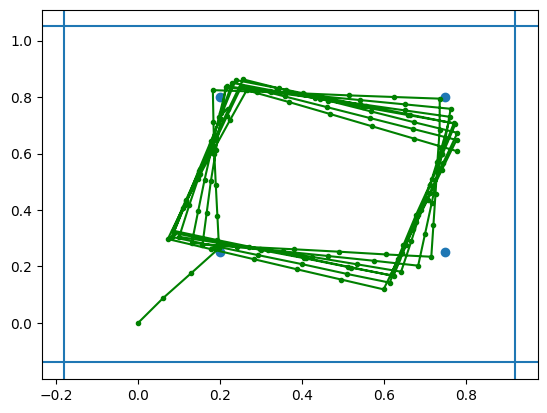

In [38]:
plt.figure()
plot_pattern(tar_pattern)
plot_path(df['real_x'],df['real_y'])
# plot_path(df['encoder_x'],df['encoder_y'])

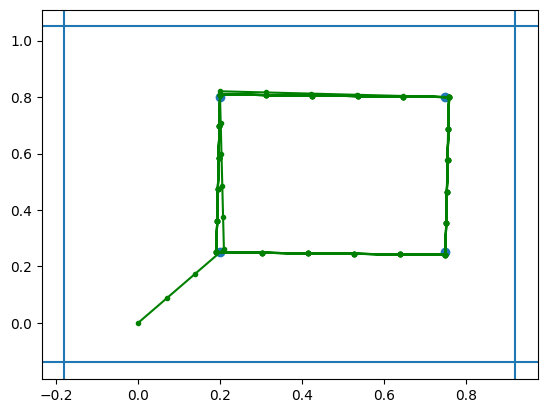

In [39]:
plt.figure()
plot_pattern(tar_pattern)
plot_path(df['encoder_x'],df['encoder_y'])

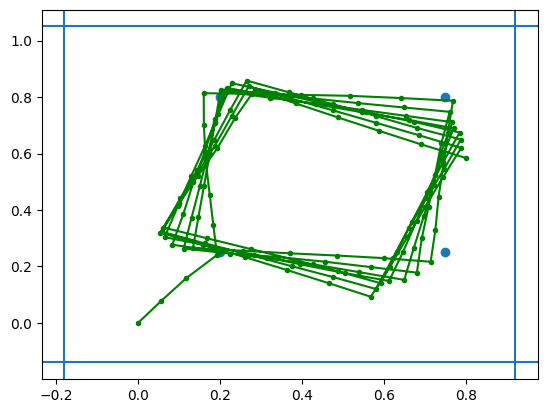

In [41]:
plt.figure()
plot_pattern(tar_pattern)
plot_path(df['ekf_x'],df['ekf_y'])

In [42]:
df.to_csv('encoder_run.csv')

In [43]:
encoder_run_df =  pd.read_csv('encoder_run.csv')
encoder_errs = np.sqrt((np.square(encoder_run_df['ekf_x'] - encoder_run_df['real_x']) + np.square(encoder_run_df['ekf_y'] - encoder_run_df['real_y']))[1:].to_list())
encoder_ang_errs = c.normalize_angle((encoder_run_df['encoder_heading'] - encoder_run_df['real_heading']).to_list())


ekf_run_df = pd.read_csv('ekf_run.csv')
ekf_errs = np.sqrt((np.square(ekf_run_df['ekf_x'] - ekf_run_df['real_x']) + np.square(ekf_run_df['ekf_y'] - ekf_run_df['real_y']))[1:].to_list())
ekf_ang_errs = c.normalize_angle((ekf_run_df['ekf_heading'] - ekf_run_df['real_heading']).to_list())


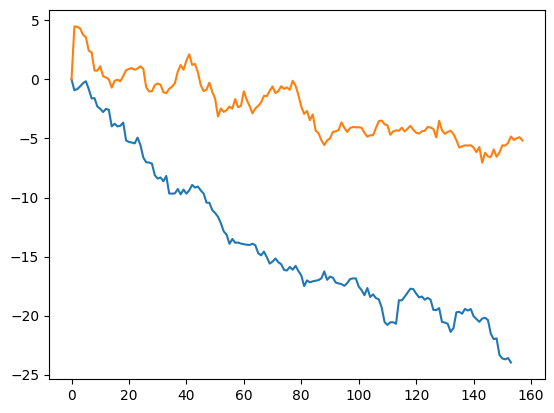

In [44]:
plt.plot(encoder_ang_errs)
plt.plot(ekf_ang_errs)

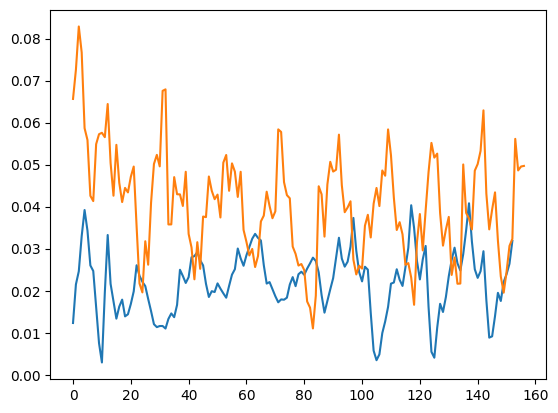

In [45]:
plt.plot(encoder_errs)
plt.plot(ekf_errs)

# CNC control

In [57]:
# com_port = '/dev/tty.usbserial-A505I3Q9'  # Update with your sensor's COM port
com_port = 'COM7'  # Update with your sensor's COM port
cnc_serial = serial.Serial(com_port, 115200)
c.init_cnc(cnc_serial)
   

In [36]:
cnc_serial.close()

In [5]:
c.absolute_movement(0, 0, cnc_serial)

Sending command: G1 X0 Y0 F1000
GRBL Response:  ok


In [55]:
adc = c.read_n_vlp(10)

taking vlp readings:  0 1 2 3 4 5 6 7 8 9 

(array([ 11.,  70., 123.,  59.,   9.,  17.,  57., 113.,  27.,  26.]),
 array([   0. ,  397.6,  795.2, 1192.8, 1590.4, 1988. , 2385.6, 2783.2,
        3180.8, 3578.4, 3976. ]),
 <BarContainer object of 10 artists>)

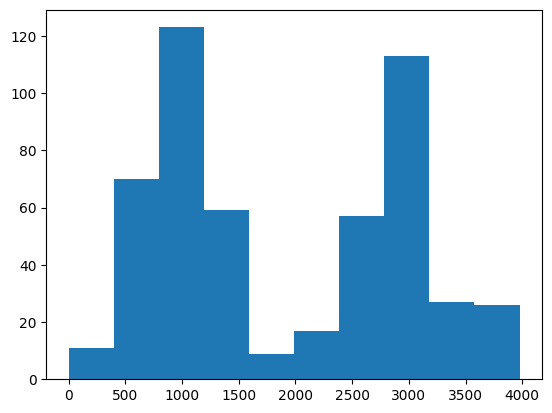

In [39]:
plt.hist(adc[4])

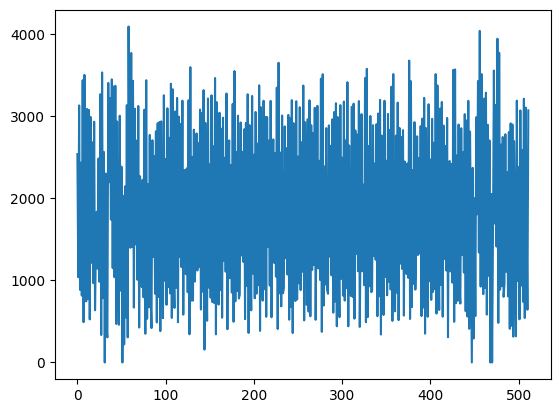

In [40]:
plt.plot(adc[6])

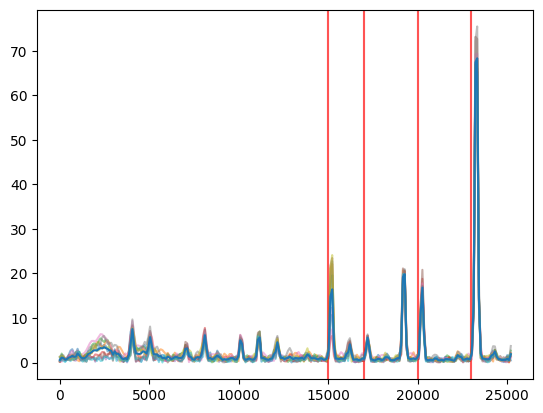

In [9]:
fft_lst = []
for i in range (10):
    t = np.array(adc)[i]
    fft, fre = c.FFT_win(t)
    fft_lst.append(fft)
    plt.plot(fre, fft, alpha = 0.5)

    
    for l in [15000, 17000, 20000, 23000]:
        plt.axvline(l, c = 'r', alpha = 0.1)

plt.plot(fre, np.mean(fft_lst, axis = 0))

In [242]:
# vive = c.vive_setup()
# print(c.read_vive(vive, n_readings= 10) ) #test



In [58]:
log_file = 'cnc_fingerprint_02.csv'
c.cnc_log_clear(log_file)

In [105]:
# Main functionality

scan_points = c.generate_scan_points(step=25)


In [49]:
import numpy as np

def generate_scan_points(step=50, width=900, height=1000):
    """
    Generates a set of coordinate points to scan over a 2D area with a zigzag pattern,
    with each point randomly offset by a uniform distribution in positive directions only,
    while ensuring that no point exceeds the boundaries of the width and height,
    and that both x and y values are greater than 0.
    """
    points = []
    
    for y in range(step, height, step):  # Start from 'step' to avoid y = 0
        if y % (2 * step) == 0:
            # Move left to right
            row_points = [(x, y) for x in range(step, width, step)]  # Start from 'step' to avoid x = 0
        else:
            # Move right to left
            row_points = [(x, y) for x in range(width - step, 0, -step)]  # Start from 'width - step'
        
        # Apply random offset to each point, ensuring the point stays within bounds
        for i, (x, y) in enumerate(row_points):
            # Generate random offsets between 0 and step (positive only)
            offset_x = np.random.uniform(0, min(step, width - x))  # Ensure x stays within width
            offset_y = np.random.uniform(0, min(step, height - y))  # Ensure y stays within height
            # Apply offset and store the new point
            points.append((x + offset_x, y + offset_y))
    
    return np.array(points)


scan_points = generate_scan_points(step = 40, width = 900, height = 1000)

In [59]:
scan_points = generate_scan_points(step = 40, width = 900, height = 1000)

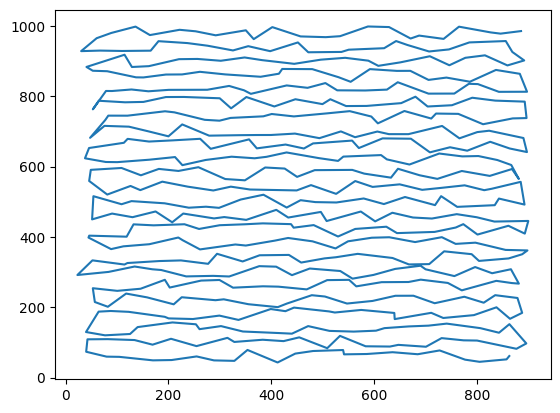

In [51]:
plt.plot(scan_points[:,0], scan_points[:,1])

In [60]:
scan_points[0]

array([883.09054677,  53.45977066])

In [61]:
c.absolute_movement(883, 53, cnc_serial)
time.sleep(6)
print('times up')

Sending command: G1 X883 Y53 F1000
GRBL Response:  ok
times up


In [24]:
len(scan_points)

624

In [62]:
last_position_id = c.get_last_logged_point(log_file)

# Determine starting point
start_index = last_position_id + 1  # Start from the next point
if start_index == 0:
    c.cnc_log_clear(log_file)  # If no valid log file exists, clear and initialize log

# Resume data collection
for i in range(start_index, len(scan_points)):
    x, y = scan_points[i]
    # Move to the point (you should implement `absolute_movement`)
    c.absolute_movement(x, y,cnc_serial)
    print(f'Moving to {x},{y}')
    time.sleep(6)  # Wait to stabilize sensors

    # Collect data (mock example)
    for _ in range(5):
        try:
            vive_data = c.read_vive(vive)
            break
        except:
            pass
    vive_data = " "
    # vlp_data, _ = c.take_mean_fft(10)
    vlp_data = c.read_n_vlp(10)
    
    # Log the data
    c.cnc_log_write(log_file, i, x, y, vive_data, vlp_data)

Sending command: G1 X883.0905467678173 Y53.459770656489965 F1000
GRBL Response:  ok
Moving to 883.0905467678173,53.459770656489965
taking vlp readings:  0 1 2 3 4 5 6 7 8 9 Sending command: G1 X839.8517022436553 Y57.76769011097293 F1000
GRBL Response:  ok
Moving to 839.8517022436553,57.76769011097293
taking vlp readings:  0 1 2 3 4 5 6 7 8 9 Sending command: G1 X788.9226638862432 Y45.46491701438464 F1000
GRBL Response:  ok
Moving to 788.9226638862432,45.46491701438464
taking vlp readings:  0 1 2 3 4 5 6 7 8 9 Sending command: G1 X751.3279138035449 Y63.31900220818741 F1000
GRBL Response:  ok
Moving to 751.3279138035449,63.31900220818741
taking vlp readings:  0 1 2 3 4 5 6 7 8 9 Sending command: G1 X711.6693799226786 Y59.34456897325507 F1000
GRBL Response:  ok
Moving to 711.6693799226786,59.34456897325507
taking vlp readings:  0 1 2 3 4 5 6 7 8 9 Sending command: G1 X697.9468534948784 Y68.51274611698946 F1000
GRBL Response:  ok
Moving to 697.9468534948784,68.51274611698946
taking vlp rea

## vive pose transform

In [2]:
import numpy as np
from scipy.spatial.transform import Rotation as R
from scipy.optimize import minimize

class OrientationTransformer:
    def __init__(self):
        self.transform_matrix = None

    def build_transform(self, raw_points, desired_points):
        """
        Builds the transformation matrix to convert raw yaw, pitch, roll to the desired reference frame.

        Parameters:
        raw_points (list of list of float): A list of N arrays, each representing [yaw, pitch, roll] in the raw frame.
        desired_points (list of list of float): A list of N arrays, each representing [yaw, pitch, roll] in the desired frame.
        """
        if len(raw_points) != len(desired_points):
            raise ValueError("Number of raw points and desired points must match.")

        def cost_function(transform_vector):
            # Transform vector defines a rotation matrix via Euler angles
            transform_rotation = R.from_euler('zyx', transform_vector, degrees=True).as_matrix()
            total_error = 0

            for raw, desired in zip(raw_points, desired_points):
                raw_rotation = R.from_euler('zyx', raw, degrees=True).as_matrix()
                desired_rotation = R.from_euler('zyx', desired, degrees=True).as_matrix()

                # Apply transformation
                transformed_rotation = np.dot(transform_rotation, raw_rotation)

                # Compute error
                error_matrix = np.dot(desired_rotation.T, transformed_rotation)
                angle_error = R.from_matrix(error_matrix).magnitude()
                total_error += angle_error**2

            return total_error

        # Optimize the transform vector (initial guess is [0, 0, 0])
        result = minimize(cost_function, [0, 0, 0], bounds=[(-180, 180), (-180, 180), (-180, 180)])

        if not result.success:
            raise RuntimeError("Optimization failed to find a valid transform.")

        # Save the resulting transformation matrix
        self.transform_matrix = R.from_euler('zyx', result.x, degrees=True).as_matrix()

    def transform(self, raw_orientation):
        """
        Transforms a raw [yaw, pitch, roll] orientation to the desired reference frame.

        Parameters:
        raw_orientation (list of float): An array representing [yaw, pitch, roll] in the raw frame.

        Returns:
        list of float: Transformed [yaw, pitch, roll] in the desired reference frame.
        """
        if self.transform_matrix is None:
            raise ValueError("Transformation matrix has not been built. Call build_transform first.")

        # Convert raw orientation to rotation matrix
        raw_rotation = R.from_euler('zyx', raw_orientation, degrees=True).as_matrix()

        # Apply the transformation
        transformed_rotation = np.dot(self.transform_matrix, raw_rotation)

        # Convert back to yaw, pitch, roll
        transformed_euler = R.from_matrix(transformed_rotation).as_euler('zyx', degrees=True)

        return transformed_euler.tolist()

# Suggested calibration points for yaw with zero pitch and roll (desired frame)
def generate_calibration_points():
    yaw_values = [0, 45, 90, 135, 180, -135, -90, -45]
    raw_points = []
    desired_points = []

    for yaw in yaw_values:
        raw_points.append([yaw + np.random.uniform(-5, 5), np.random.uniform(-2, 2), np.random.uniform(-2, 2)])
        desired_points.append([yaw, 0, 0])

    return raw_points, desired_points




In [3]:
raw_calibration_points, desired_calibration_points = generate_calibration_points()

In [4]:
raw_calibration_points

[[-1.4486288969825, -0.8592204717742087, -0.8234303617341321],
 [49.65097076823027, -1.6437974080380395, -1.7831470605821607],
 [93.22230889505094, -0.34679139351794674, 0.7685642263929244],
 [136.78707410009068, 1.6876620878914528, -0.8312794863740725],
 [179.5274504261781, -1.564160938331658, 1.4847490934952168],
 [-139.61393275592818, -1.3056471509214091, -0.915266895620165],
 [-89.93398026325974, -0.2730123518970533, 1.1827420221134681],
 [-49.91980055904709, -1.384853678111647, -0.6276115190718934]]

In [ ]:
# Example usage:
# Define raw and desired calibration points (yaw, pitch, roll in degrees)


transformer = OrientationTransformer()
transformer.build_transform(raw_calibration_points, desired_calibration_points)

# Transform a new raw orientation
raw_orientation = [60, 1, 1]
transformed_orientation = transformer.transform(raw_orientation)
print("Transformed orientation:", transformed_orientation)

In [ ]:
vive = c.vive_setup()

c.read_vive(vive)[:3]

In [ ]:
c.average_vive_readings(c.read_vive(vive))

np.float64(0.6687380194664001)

In [69]:
pose3 = np.apply_along_axis(c.average_vive_readings, 0 ,  np.array(c.read_vive(vive)))[3:]

In [70]:
raw_calibration_points = np.array([pose1, pose2, pose3])

In [ ]:
from scipy.spatial.transform import Rotation as R

class ViveToRobotTransform:
    # ... [existing methods unchanged]

    def transform_orientation(self, yaw_pitch_roll):
        """
        Transform a yaw, pitch, roll orientation from tracker frame to room frame.

        Parameters:
        yaw_pitch_roll (list of float): [yaw, pitch, roll] in the tracker reference frame.

        Returns:
        list of float: [yaw, pitch, roll] in the room reference frame.
        """
        if self.transformation_matrix is None:
            raise ValueError("Transformation not yet derived. Call `derive_transform` first.")

        # Convert yaw, pitch, roll to rotation matrix
        raw_rotation = R.from_euler('zyx', yaw_pitch_roll, degrees=True).as_matrix()

        # Apply the positional transformation to the rotation matrix
        transformed_rotation = self.transformation_matrix[:3, :3] @ raw_rotation

        # Convert back to yaw, pitch, roll
        transformed_euler = R.from_matrix(transformed_rotation).as_euler('zyx', degrees=True)

        return transformed_euler.tolist()


Transformed orientation: [160.22989873661334, -61.5708115771416, -31.08009833933425]


In [72]:
raw_lst = []
tra_lst = []

[ -0.33719857 -29.03383401  90.43535076]
[6.065839706020269, 1.6270964944398643, -14.122116045113465]


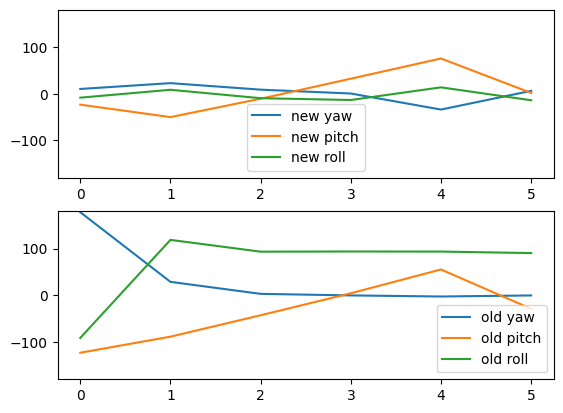

: 

In [ ]:


raw_pose = np.apply_along_axis(c.average_vive_readings, 0 ,  np.array(c.read_vive(vive)))[3:]
trans_pose = transformer.transform(raw_pose)
print(raw_pose)
print(trans_pose)
raw_lst.append(raw_pose)
tra_lst.append(trans_pose)

plt.figure()
ax1 = plt.subplot(212)
ax1.plot(np.array(raw_lst)[:,0], label = 'old yaw')
ax1.plot(np.array(raw_lst)[:,1], label = 'old pitch')
ax1.plot(np.array(raw_lst)[:,2], label = 'old roll')

ax2 = plt.subplot(211)
ax2.plot(np.array(tra_lst)[:,0], label = 'new yaw')
ax2.plot(np.array(tra_lst)[:,1], label = 'new pitch')
ax2.plot(np.array(tra_lst)[:,2], label = 'new roll')
ax1.set_ylim(-180,180)
ax2.set_ylim(-180, 180)
ax1.legend()
ax2.legend()
